<h1><center>Laboratorio 5: El Pandas no muerde (act. II) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza y Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano y Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Simón Repolt
- Nombre de alumno 2: Magdalena De La Fuente

### **Link de repositorio de GitHub:** `https://github.com/HexaPulsar/LabMDS`

# Temas a tratar

- Manejo de datos tabulares usando `pandas`. En esta segunda parte se incluye adicionalmente agregaciones, concatenaciones, merge y trabajo con strings.
- Visualizaciones interactivas de los datos con `plotly`.

### Reglas:

- **Grupos de máximo 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas` para manipular datos tabulares.
- Utilizar `plotly` para obtener información gráfica del dataset.

> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# Importamos librerias utiles 😸

In [11]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import plotly.express as px
from IPython.display import display

#Libreria para visualizar
#!pip install --upgrade plotly
import plotly.figure_factory as ff
import plotly.express as px

# 1. Rendimiento en Estudiantes 📚


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1hZZaPQlZe4VupFOXt76_wjuUA5NpUhrw" width="300" height="300">
</p>

Para este laboratorio deberán continuar el Análisis Exploratorio de datos sobre el conjunto ```students_grades.csv```, el cual contiene una caracterización sobre el rendimiento y otros atributos de cada alumno de la *Universidad de la Cachaña* .

In [12]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    #path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# 1. Carga de Datos [0.5 Puntos]

Ya finalizado en análisis inicial, ud. y su equipo le entregaron a *Don Caguayo* (rector de la Universidad de la Cachaña) tanto los resultados del análisis como también la base de datos limpia y lista para ser almacenada. Dada la ingente cantidad de los datos, el equipo de TI de la universidad resolvió separar el dataset en dos bases de datos distintas (lo que según argumentan ellos, permitiría hacer agregaciones de forma más eficiente).

Gracias a la excelente labor de ud. y su equipo en el análisis previo, el rector le solicita continuar el trabajo con una nueva batería de análisis. Por este motivo, la sección de TI les entrega nuevamente los datos. Sin embargo, argumentan que dada una escazes de personal, solo le entregarán *dumps* (copias) de cada base de datos y su equipo deberá unir las bases de datos. Los datos se encuentran en los siguiente archivos `.json`: `students_grades_1.json` y `students_grades_2.json`.


Por ende, ud. y su equipo deciden que la primera tarea se centrará en cargar estos datos y unirlos.

**No se preocupe por la limpieza ni transformar el tipo de datos de las columnas, ni tampoco transformar a notas chilenas**, recuerde que anteriormente ya se encargo de este tema.

In [13]:
types = {"names": str,
    "gender": str,
    "race/ethnicity": str,
    "parental level of education": str,
    "lunch": str,
    "test preparation course": str,
    "math score": float,
    "reading score": float,
    "writing score": float
}

paths = ['/content/students_grades_1.json', '/content/students_grades_2.json' ]
df_grades =pd.concat([pd.read_json(paths[0], dtype = types), pd.read_json(paths[1], dtype = types)]).reset_index().drop(columns = ['index'])

Resultado esperado:

In [14]:
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22
...,...,...,...,...,...,...,...,...,...
870,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26
871,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86
873,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72


## Análisis de Las Notas v2 [0.5 Cada gráfico + 0.5 respuesta]

Preocupado por la dificultad que representa el graficar correctamente las notas, el rector le solicita implementar distintas alternativas de visualización.

Para esto, genere un [boxplot](https://plotly.com/python/box-plots/), un [displot](https://plotly.com/python/distplot/#distplot-with-pandas), un [histograma con un gráfico marginal de caja](https://plotly.com/python/histograms/#visualizing-the-distribution) y un [histograma con el ramo como faceta de fila](https://plotly.com/python/facet-plots/#histogram-facet-grids) que permitan visualizar las notas.

Luego, responda las siguientes pregunta:

> 1. ¿Existe una diferencia notable entre las notas?

> 2. ¿Cuál de los gráficos mostrados cree que es adecuado para mostrarle al rector? ¿Y a los padres? ¿Y a un centro de estudios educativos? ¿Por qué?. Base sus respuestas en lo visto en la clase de visualizaciones como también en lo que usted y su equipo consideren correcto.

> Hint: Para elaborar el histograma, puede que le sea de utilidad hacer un `melt` del DataFrame, dejando como variables los ramos y valores las notas. Por otra parte, visiten la documentación para generar los gráficos.


**Gráfico de Caja:**

In [15]:
df = px.data.tips()
fig = px.box(df_grades[['math score', 'reading score', 'writing score']])
fig.update_layout(title_text = 'Boxplot para puntajes')

fig.show()

**Distplot:**

In [16]:
# use displot figurefactory
to_plot  = [df_grades['reading score'], df_grades['math score'], df_grades['writing score']]
fig = ff.create_distplot(to_plot, ['reading', 'math', 'writing'],
                         bin_size = .2)
fig.update_layout(title_text = 'Distplot para puntajes')
fig.show()

**Histograma con Boxplots:**

In [17]:
fig = px.histogram(df_grades[['math score','reading score', 'writing score']],
                   marginal = 'box')

fig.update_layout(title_text = 'Histograma con box marginal para puntajes')
fig.show()

**Histograma con Faceta:**

In [18]:
fig = px.histogram(df_grades[['math score', 'reading score', 'writing score', 'gender']], facet_row = "gender")
fig.update_layout(title_text = 'Histograma con faceta')
fig.show()


**Resultados Esperados:**

**Justifique:**

> 1. ¿Existe una diferencia notable entre las notas?

> 2. ¿Cuál de los gráficos mostrados cree que es adecuado para mostrarle al rector? ¿Y a los padres? ¿Y a un centro de estudios educativos? ¿Por qué?. Base sus respuestas en lo visto en la clase de visualizaciones como también en lo que usted y su equipo consideren correcto.


1. Las notas "math", "reading" y "writing" tienen medias y medianas muy similares. Además, se distribuyen similarmente. Por lo que no existe una diferencia clara. Los cuartiles 1 y 4 en las tres categorías tienen límites similares también, lo que apoya la hipótesis de que no hay una diferencia significativa entre las distintas materias.


----

2. El gráfico más adecuado para mostrarle a un director sería el de distribución de puntajes, justamente porque muestra la distribución de puntajes de los estudiantes, lo que le permitiría visualizar como le va a sus estudiantes de manera global.

  	El gráfico más adecuado para mostrarle a los padres es el de cajas. Con este es fácil mostrar los mínimos, máximos y mediana de las pruebas de "math", "reading" y "writing". Es mucho más simple de entender que los otros gráficos, sobre todo en el caso de que la mayoría de los padres podrían no tener suficiente comprensión para entender los otros gráficos.

  Para el centro de estudios educativos, un gráfico útil sería el histograma con facetas, donde la categoría de las facetas corresponde al género. Esto le permitiría al centro determinar como ajustar la brecha de género a través de nuevas políticas educativas.

## Análisis por Nivel Educacional Etnia de los Padres [1.5 Puntos]

El rector, basado en su experiencia, cree fuertemente que el nivel educacional y la etnia de los padres influyen en las notas que obtienen sus hijos.
Como científicos de datos, ud. y su equipo creen que deben encontrar evidencia para confirmar o refutar la hipótesis del rector.

Para esto, deciden generar dos análisis: una tabla de resumen por una parte y gráficos de caja por otro.

### Tabla de Resumen

Para generar la tabla de resumen:

- [ ] Calcular el promedio de las notas y guardarlo en una variable `GPA` (grade point average).
- [ ] Hacer una simplificación a través de un mapeo (investigar el método `map()`) de la variable `parental level of education`  según la siguiente conversión:

        some high school -> school
        some college -> school
        high school -> school
        bachelor's degree -> college
        associate's degree -> college
        master's degree -> postgraduate

  Los resultados de este mapeo deben ser guardados en la columna `simple parental level of education`.


- [ ] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener el promedio de las notas.
- [ ] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener un conteo de los alumnos en cada grupo y agregarlos como una nueva fila count.
- [ ] Obtener el porcentaje de alumnos con respecto al total. Los porcentajes deben ser strings que contienen la frecuencia de cada grupo con respecto al total y deben ser terminados en '%'.


Utilizar la tabla de resultados esperados como guía para desarrollar este punto.

### 1.3.4 Información por Categorías [1 punto]

In [19]:
def convert(str):
  if 'some college' in str:
    str = 'school'
    return str
  elif 'school' in str:
    str = 'school'
    return str
  elif 'master' in str:
    str = 'postgraduate'
    return str
  elif 'degree' in str:
    str = 'college'
    return str

df_grades['simple parental level of education'] = pd.DataFrame(list(map(convert,df_grades['parental level of education'])))
df_grades['GPA'] = df_grades[['reading score','math score','writing score']].agg('mean', axis = 'columns')


grouped = df_grades.groupby(by=['race/ethnicity','simple parental level of education']).agg({'math score':'mean','reading score':'mean','writing score':'mean', 'GPA':'mean'}).round(2)

grouped = grouped.assign(Count=df_grades.groupby(by=['race/ethnicity','simple parental level of education']).agg({'simple parental level of education':'count'}))

grouped['percentage'] = (grouped['Count']/grouped['Count'].sum() *100).round(2).astype(str) + '%'
display(grouped)

math score  reading score  \
race/ethnicity simple parental level of education                              
group A        college                                   4.74           5.00   
               postgraduate                              4.69           5.23   
               school                                    4.57           4.73   
group B        college                                   5.07           5.26   
               postgraduate                              4.91           5.69   
               school                                    4.69           4.89   
group C        college                                   5.02           5.37   
               postgraduate                              4.92           5.14   
               school                                    4.76           5.02   
group D        college                                   5.11           5.25   
               postgraduate                              5.22           5.54   
               school                                    5.02           5.13   
group E        college                                   5.54           5.45   
               postgraduate                              5.54           6.03   
               school                                    5.40           5.31   

                                                   writing score   GPA  Count  \
race/ethnicity simple parental level of education                               
group A        college                                      4.89  4.88     24   
               postgraduate                                 5.35  5.09      2   
               school                                       4.56  4.62     51   
group B        college                                      5.19  5.18     54   
               postgraduate                                 5.55  5.38      5   
               school                                       4.76  4.78    107   
group C        college                                      5.35  5.25    102   
               postgraduate                                 5.10  5.06     15   
               school                                       4.92  4.90    155   
group D        college                                      5.25  5.20     70   
               postgraduate                                 5.73  5.50     20   
               school                                       5.11  5.09    149   
group E        college                                      5.45  5.48     52   
               postgraduate                                 5.89  5.82      6   
               school                                       5.16  5.29     63   

                                                  percentage  
race/ethnicity simple parental level of education             
group A        college                                 2.74%  
               postgraduate                            0.23%  
               school                                  5.83%  
group B        college                                 6.17%  
               postgraduate                            0.57%  
               school                                 12.23%  
group C        college                                11.66%  
               postgraduate                            1.71%  
               school                                 17.71%  
group D        college                                  8.0%  
               postgraduate                            2.29%  
               school                                 17.03%  
group E        college                                 5.94%  
               postgraduate                            0.69%  
               school                                   7.2%

**Resultado Esperado**

|    | race/ethnicity   | simple parental level of education   |   math score |   reading score |   writing score |   GPA |   count | percentage   |
|---:|:-----------------|:-------------------------------------|-------------:|----------------:|----------------:|------:|--------:|:-------------|
|  0 | group A          | college                              |         4.74 |            5    |            4.89 |  4.88 |      24 | 2.74 %       |
|  1 |           | postgraduate                         |         4.69 |            5.23 |            5.35 |  5.09 |       2 | 0.23 %       |
|  2 |           | school                               |         4.57 |            4.73 |            4.56 |  4.62 |      51 | 5.83 %       |
|  3 | group B          | college                              |         5.07 |            5.26 |            5.19 |  5.18 |      54 | 6.17 %       |
|  4 |           | postgraduate                         |         4.91 |            5.69 |            5.55 |  5.38 |       5 | 0.57 %       |
|  5 |           | school                               |         4.69 |            4.89 |            4.76 |  4.78 |     107 | 12.23 %      |
|  6 | group C          | college                              |         5.02 |            5.37 |            5.35 |  5.25 |     102 | 11.66 %      |
|  7 |           | postgraduate                         |         4.92 |            5.14 |            5.1  |  5.06 |      15 | 1.71 %       |
|  8 |           | school                               |         4.76 |            5.02 |            4.92 |  4.9  |     155 | 17.71 %      |
|  9 | group D          | college                              |         5.11 |            5.25 |            5.25 |  5.2  |      70 | 8.0 %        |
| 10 |           | postgraduate                         |         5.22 |            5.54 |            5.73 |  5.5  |      20 | 2.29 %       |
| 11 |           | school                               |         5.02 |            5.13 |            5.11 |  5.09 |     149 | 17.03 %      |
| 12 | group E          | college                              |         5.54 |            5.45 |            5.45 |  5.48 |      52 | 5.94 %       |
| 13 |          | postgraduate                         |         5.54 |            6.03 |            5.89 |  5.82 |       6 | 0.69 %       |
| 14 |          | school                               |         5.4  |            5.31 |            5.16 |  5.29 |      63 | 7.2 %        |

## Visualizaciones [0.5 Puntos]

Ahora, implemente un gráfico de caja en donde se muestre el GPA con respecto al nivel educacional y que la variable de color sea la etnicidad y luego comente.

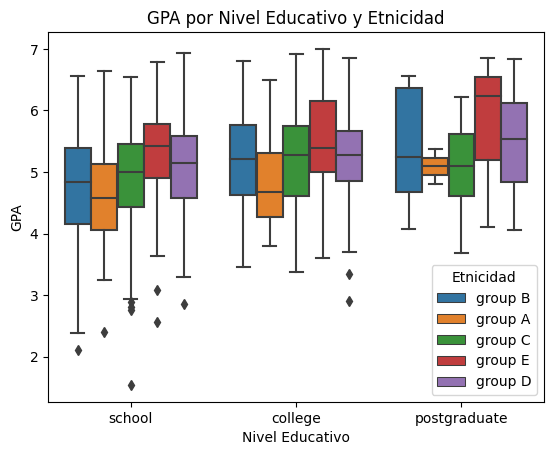

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='simple parental level of education', y='GPA', hue='race/ethnicity', data=df_grades)
plt.title('GPA por Nivel Educativo y Etnicidad')
plt.xlabel('Nivel Educativo')
plt.ylabel('GPA')
plt.legend(title='Etnicidad')
plt.show()


> 1. ¿Hay alguna diferencia entre los grupos graficados tanto para el nivel educacional de los padres como también para la etnicidad?
> 2. ¿Este gráfico permite hacer facilmente un análisis conjunto de estas dos variables de forma sencilla?

**Justifique:**

1-La tendencia mas clara que se puede ver es que a medida que el nivel educacional es mayor, el GPA aumenta de forma considerable, sin embargo, cuando se observan los boxplot segun el color acorde a cada etnicidad, es posible ver que la tendencia no se mantiene a lo largo de todo el gráfico. Curiosamente ocurre que para la etnicidad A, para un nivel educacional de los padres equivalente a postgrado, el gpa disminuye en comparacion a los demas niveles educacionales , lo mismo con el grupo C. Por otra parte, la tendencia se mantiene clara para el resto de los grupos

2-El gráfico boxplot permite facilmente realizar analisis sobre tres variables de manera simultanea mediante una visualizacion simple de entender y  bastante intuitiva, por lo que resulta util para cuando se desea analizar variables del mismo tipo

# 1.3.5 Combinar Dataset [1 punto]

Mientras le notificaba por videollamada los resultados de sus descubrimientos a Don Caguayo, un exaltado practicante del area de TI entra a la reunión y les informa que ha encontrado una nueva base de datos que cuenta con las notas de dos asignaturas (en escala chilena): historia y ciencias.
Para más remate, antes de huir, el practicante les cuenta que este dataframe lamentablemente contiene nuevamente los alumnos de los registros corruptos que ud. y su equipo filtraron en el análisis anterior.


El rector (evidentemente molesto por la situación) les ruega incluir estos datos (vaciados en el archivo other_grades.csv) al estudio original(`students_grades.csv`).


Para esto, carge el archivo `other_grades.csv` y busque la forma de unir ambos DataFrames, de tal manera que las columnas de `history score` y `science score` se anexen al final del DataFrame original. **NO LIMPIE LOS DATOS**, si no que explore los distintos tipos de merge para encontrar el mas situable para su situación (y así evitar buscar duplicados).

**To-Do**


- [ ] Cargar el `other_grades.csv`
- [ ] Unir `df_grades` con `other_grades.csv` usando outer join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando left join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando right join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando inner join y explique el resultado.
- [ ] Defina cuál join es el que utilizará para generar el nuevo DataFrame.

> **Hint**: Puede explicar los resultados del merge a través de la cantidad de filas resultantes y los valores que estas contienen.
> **Hint**: Puede explicar los resultados del merge a través de la cantidad de filas resultantes y los valores que estas contienen.

In [39]:
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,simple parental level of education,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,school,3.58
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,college,5.78
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,school,5.04
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,school,5.64
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,school,6.34
...,...,...,...,...,...,...,...,...,...,...,...
870,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,school,5.30
871,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,school,3.06
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,college,5.42
873,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,school,4.54


In [31]:
other_grades = pd.read_csv("/content/other_grades.csv")
other_grades

,names,science score,history score
0,Pam Otoole,57,4.0
1,Diane Olson,48,4.8
2,Sarah Flannery,72,6.1
3,Stanley Chappell,47,3.7
4,Arnold Dodson,60,5.2
...,...,...,...
995,Melanie Acevedo,79,6.3
996,Christopher Wall,62,4.0
997,Margaret Spannaus,47,4.0
998,Vickie Sellers,47,5.7


In [33]:
merged1 = pd.merge(df_grades, other_grades, on='names', how='outer')
merged1

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,simple parental level of education,GPA,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,school,3.58,25,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,college,5.78,56,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,school,5.04,58,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,school,5.64,72,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,school,6.34,94,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Leona Markow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,3.8
996,Maxine Gulbranson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,3.9
997,Jeane Budds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,3.9
998,Nancy Ramos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,6.2


In [36]:
merged2 = pd.merge(df_grades, other_grades, on='names', how='left')
merged2

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,simple parental level of education,GPA,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,school,3.58,25,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,college,5.78,56,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,school,5.04,58,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,school,5.64,72,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,school,6.34,94,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,school,5.30,62,4.2
871,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,school,3.06,16,3.6
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,college,5.42,59,4.1
873,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,school,4.54,43,4.3


In [37]:
merged3 = pd.merge(df_grades, other_grades, on='names', how='right')
merged3

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,simple parental level of education,GPA,science score,history score
0,Pam Otoole,female,group B,bachelor's degree,standard,none,5.32,5.32,5.44,college,5.36,57,4.0
1,Diane Olson,female,group C,some college,standard,completed,5.14,6.40,6.28,school,5.94,48,4.8
2,Sarah Flannery,female,group B,master's degree,standard,none,6.40,6.70,6.58,postgraduate,6.56,72,6.1
3,Stanley Chappell,male,group A,associate's degree,free/reduced,none,3.82,4.42,3.64,college,3.96,47,3.7
4,Arnold Dodson,male,group C,some college,standard,none,5.56,5.68,5.50,school,5.58,60,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Melanie Acevedo,female,group E,master's degree,standard,completed,6.28,6.94,6.70,postgraduate,6.64,79,6.3
996,Christopher Wall,male,group C,high school,free/reduced,none,4.72,4.30,4.30,school,4.44,62,4.0
997,Margaret Spannaus,female,group C,high school,free/reduced,completed,4.54,5.26,4.90,school,4.90,47,4.0
998,Vickie Sellers,female,group D,some college,standard,completed,5.08,5.68,5.62,school,5.46,47,5.7


In [38]:
merged4 = pd.merge(df_grades, other_grades, on='names', how='inner')
merged4

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,simple parental level of education,GPA,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,school,3.58,25,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,college,5.78,56,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,school,5.04,58,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,school,5.64,72,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,school,6.34,94,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,school,5.30,62,4.2
871,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,school,3.06,16,3.6
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,college,5.42,59,4.1
873,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,school,4.54,43,4.3


> **Respuesta**:
Se descartan inmediatamente los joins utilizando outer y right join debido a que estan añadiendo columnas al dataset df_grades tras el merge, cosa que implica que se estan duplicando alumnos y/o generando filas con NaNs. Finalmente, se escoge finalmente quedarse el inner join ya que este asegura que el dataset resultante es la intersección de los elementos en comun con respecto a los nombres , que es lo que finalmente se busca: añadir notas a los alumnos que ya estan en df_grades

## 1.4 Más visualizaciones [0.5 puntos]


<p align="center">
  <img src="https://media4.giphy.com/media/xT5LMWNOjGqJzUfyve/giphy.gif?cid=ecf05e47phkhvg6vadqvcoobvxwj9bzxxk38jjvkcc6eak6t&rid=giphy.gif&ct=g">
</p>



Genere dos visualizaciones extras que encuentre interesantes (y no triviales) con estos datos y explique sus resultados. Agrupe los atributos que estime convenientes.


**To-Do:**
- [ ] Generar dos nuevas visualizaciones con los datos y explicar que están representando.


> **NOTA: No utilice historia ni ciencias, son notas generadas aleatoriamente.**

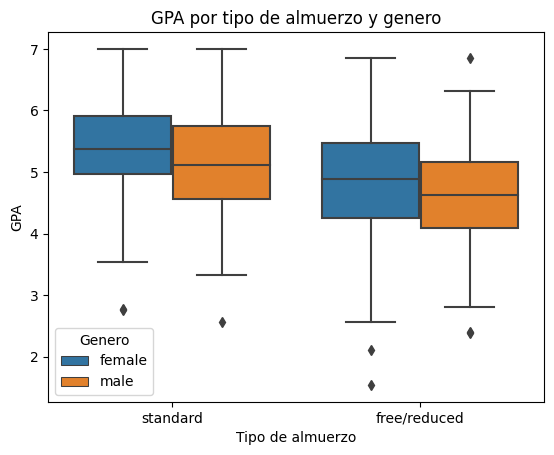

In [43]:
sns.boxplot(x='lunch', y='GPA', hue='gender', data=df_grades)
plt.title('GPA por tipo de almuerzo y genero')
plt.xlabel('Tipo de almuerzo')
plt.ylabel('GPA')
plt.legend(title='Genero')
plt.show()

Lo que busca el gráfico anterior es realizar un boxplot del GPA de los estudiantes con respecto a su genero y si tienen beca de alimentacion por lo que es posible ver claramente que aquellos estudiantes que no tienen beca de alimentacion tienen un mejor rendimiento general que aquellos que si, incluyendo a ambos generos, donde se marca la tendencia que el género femenino tiene mejores notas en ambos casos.

In [45]:
fig = px.histogram(df_grades[['GPA', 'gender']], facet_row = "gender")
fig.update_layout(title_text = 'Histograma con faceta de distribucion de notas para ambos generos')
fig.show()

El gráfico anterior busca encontrar alguna distribucion en los promedios generales de los estudiantes, diferenciadas por genero, donde es posible ver que ambos histogramas pueden ser aproximados utilizando una distribución normal, lo cual hace mucho sentido puesto que en la realidad tanto las notas como los promedios tienen a tener este tipo de distribuciones en la poblacion. Por otra parte es posible ver que el histograma "peak" de la distribución de GPA para las mujeres es mayor tanto en cantidad como en promedio, reforzando la idea anterior del grafico anterior de que las mujeres tienden a ser mejores alumnos que los hombres, dato que es interesante para los directivos de cualquier centro educativo para mejorar sus planes y programas y asi todos puedan desarrollar mejor sus habilidades

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media1.tenor.com/images/2f7df460196625edc45b8380d158e5ee/tenor.gif?itemid=16669403">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>